# Exercise on data handling and analysis

In this exercise, you will work on data analysis, and learn how to handle, visualize and cluster data.

The goal is to learn:
*	how to use `pandas` DataFrames to handle data in Python
*	how to visualize data using the `seaborn` package
*	how to use clustering algorithms available in `scikit-learn` to group data points.
*	how to use dimensionality reduction also in scikit-learn to improve visualization and extract relevant features.


## 1. Plotting the data
In the first part of this exercise we will use `pandas` DataFrames to store and manipulate the data and use `seaborn` to produce nice visualizations of the data.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

#Read in the data to a pandas DataFrame using the read_csv method.

train=pd.read_csv('titanic_data.csv')
#df_test
train


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1
2,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000000,0,0,27042,30.0000,A23,S,B,NaN,"Hessle, Yorks",1
3,1,1,"Beckwith, Mr. Richard Leonard",male,37.000000,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",1
4,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,1,1,11751,52.5542,D35,S,5,NaN,"New York, NY",1
5,1,1,"Bissette, Miss. Amelia",female,35.000000,0,0,PC 17760,135.6333,C99,S,8,NaN,NaN,1
6,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S,8,NaN,"Birkdale, England Cleveland, Ohio",1
7,1,0,"Brady, Mr. John Bertram",male,41.000000,0,0,113054,30.5000,A21,S,NaN,NaN,"Pomeroy, WA",1
8,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.000000,2,0,11769,51.4792,C101,S,D,NaN,"Belmont, MA",1
9,1,0,"Butt, Major. Archibald Willingham",male,45.000000,0,0,113050,26.5500,B38,S,NaN,NaN,"Washington, DC",1


## Data Dictionary

|Variable |	Definition |	Key         |
|----------------------------------------
|survival | Survival   |0 = No, 1 = Yes |
|pclass	| Ticket class |	1 = 1st, 2 = 2nd, 3 = 3rd |
|sex	| Sex	|
|age	| Age in years	|
|sibsp	| # of siblings / spouses aboard the Titanic	|
|parch	| # of parents / children aboard the Titanic	|
|ticket	| Ticket number	|
|fare	| Passenger fare	|
|cabin	| Cabin number	|
|embarked |	Port of Embarkation	| C = Cherbourg, Q = Queenstown, S = Southampton|
|boat | number on rescue boat | 
|body | recovered body number |
|home.dest | home destination |
|has_cabin_number | has a cabin | 0 = No, 1 = Yes|


### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

#### sibsp: The dataset defines family relations in this way

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

#### parch: The dataset defines family relations in this way

Parent = mother, father

Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

First we will look at the pandas DataFrame and also add a few new columns, based on data in other columns. 

Add some binary information columns:
* Add a 'child' column where those with age < 10 get a 1 and the others 0
* Add a 'female' column for female
* Add a 'male' column for male
* Add a 'adult' column for those with age > 16
* Add a 'adult_male' column for those with age > 16 and male
* Add an 'adult_female' column for those with age > 16 and female


In [2]:
#EXAMPLE
#This will add a new column with the name 'child' containing all 0
train['child']=0
#This will change the values of rows that statisfy the train['age']<10 condition
train['child'].loc[train['age']<10]=1
#train
train['adult_male']=0
#This will change the values of rows that statisfy the train['age']> 16 and train['sex']=='male' condition, 
#the paranteses around the expression are important.
train['adult_male'].loc[(train['age']>16) & (train['sex']=='male')]=1
#train

########
#Now try adding the other examples 
train['adult']=0
train['adult'].loc[train['age']>16]=1
train['adult_female']=0
train['adult_female'].loc[(train['age']>16) & (train['sex']=='female')]=1

train['female']=0
train['male']=0
train['female'].loc[(train['sex']=='female')]=1
train['male'].loc[(train['sex']=='male')]=1

train



C:\Users\tingtinf\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,boat,body,home.dest,has_cabin_number,child,adult_male,adult,adult_female,female,male
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,...,2,NaN,"St Louis, MO",1,0,0,1,1,1,0
1,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2,0,11769,51.4792,C101,...,D,NaN,"Bayside, Queens, NY",1,0,0,1,1,1,0
2,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.000000,0,0,27042,30.0000,A23,...,B,NaN,"Hessle, Yorks",1,0,1,1,0,0,1
3,1,1,"Beckwith, Mr. Richard Leonard",male,37.000000,1,1,11751,52.5542,D35,...,5,NaN,"New York, NY",1,0,1,1,0,0,1
4,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,1,1,11751,52.5542,D35,...,5,NaN,"New York, NY",1,0,0,1,1,1,0
5,1,1,"Bissette, Miss. Amelia",female,35.000000,0,0,PC 17760,135.6333,C99,...,8,NaN,NaN,1,0,0,1,1,1,0
6,1,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,...,8,NaN,"Birkdale, England Cleveland, Ohio",1,0,0,1,1,1,0
7,1,0,"Brady, Mr. John Bertram",male,41.000000,0,0,113054,30.5000,A21,...,NaN,NaN,"Pomeroy, WA",1,0,1,1,0,0,1
8,1,1,"Brown, Mrs. John Murray (Caroline Lane Lamson)",female,59.000000,2,0,11769,51.4792,C101,...,D,NaN,"Belmont, MA",1,0,0,1,1,1,0
9,1,0,"Butt, Major. Archibald Willingham",male,45.000000,0,0,113050,26.5500,B38,...,NaN,NaN,"Washington, DC",1,0,1,1,0,0,1


Plot the distribution of all columns containing continuous values using `distplot` <a href="https://seaborn.pydata.org/generated/seaborn.distplot.html" target="_blank">https://seaborn.pydata.org/generated/seaborn.distplot.html</a> 


If you get an error because of missing values; use the `dropna()` method to remove rows corresponding to missing values, e.g `df['key'].dropna()`

Any idea why the age distribution has a strange peak?


30.018111617419716
30.05297551266586


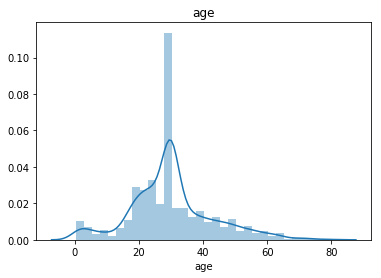

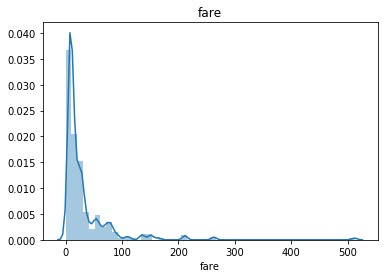

In [3]:
plt.clf()
sns.distplot(train['age']) #x='age',data=train)
import numpy as np
estimated_rows=(train['age']>29.8) & (train['age']<29.9)
#print ~estimated_rows
print(np.mean(train['age']))
print(np.mean(train[~estimated_rows]['age']))
plt.title('age')
plt.show()

sns.distplot(train['fare'].dropna()) #x='age',data=train)
plt.title('fare')
plt.show()


Use the `pandas` `sort_values` <a href="http://pandas.pydata.org/pandas-docs/version/0.19/generated/pandas.DataFrame.sort_values.html" target="_blank">http://pandas.pydata.org/pandas-docs/version/0.19/generated/pandas.DataFrame.sort_values.html</a> method to find the most expensive ticket, how many were traveling on the same ticket?

In [4]:
### code below

train.sort_values('fare',ascending=False)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,boat,body,home.dest,has_cabin_number,child,adult_male,adult,adult_female,female,male
789,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.000000,0,1,PC 17755,512.3292,B51 B53 B55,...,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA",1,0,1,1,0,0,1
790,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.000000,0,1,PC 17755,512.3292,B51 B53 B55,...,3,NaN,"Germantown, Philadelphia, PA",1,0,0,1,1,1,0
816,1,1,"Lesurer, Mr. Gustave J",male,35.000000,0,0,PC 17755,512.3292,B101,...,3,NaN,NaN,1,0,1,1,0,0,1
842,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,NaN,...,3,NaN,NaN,0,0,0,1,1,1,0
19,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,...,10,NaN,"Winnipeg, MB",1,0,0,1,1,1,0
21,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,...,10,NaN,"Winnipeg, MB",1,0,0,1,1,1,0
22,1,0,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,...,NaN,NaN,"Winnipeg, MB",1,0,1,1,0,0,1
23,1,0,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,C23 C25 C27,...,NaN,NaN,"Winnipeg, MB",1,0,1,1,0,0,1
24,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.000000,1,4,19950,263.0000,C23 C25 C27,...,10,NaN,"Winnipeg, MB",1,0,0,1,1,1,0
20,1,1,"Fortune, Miss. Ethel Flora",female,28.000000,3,2,19950,263.0000,C23 C25 C27,...,10,NaN,"Winnipeg, MB",1,0,0,1,1,1,0


Use `countplot`  <a href="https://seaborn.pydata.org/generated/seaborn.countplot.html" target="_blank">https://seaborn.pydata.org/generated/seaborn.countplot.html</a> to visualize all categorical values, e.g. 'survived', 'sex' etc. Use the `hue` option to split the data even further using new columns you added initially!


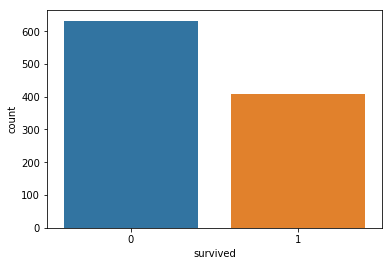

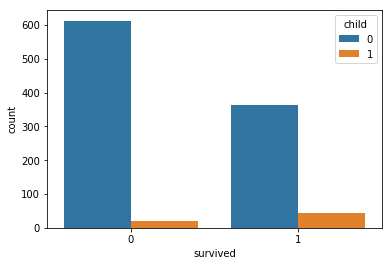

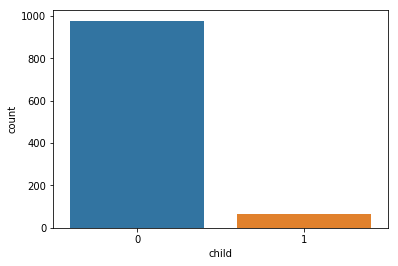

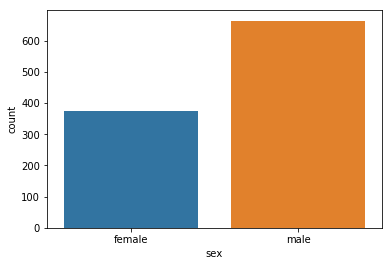

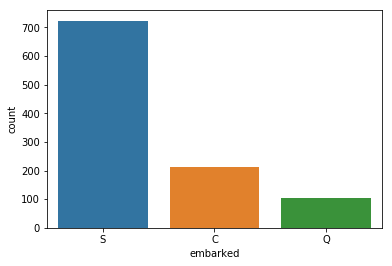

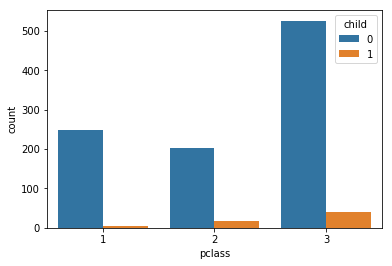

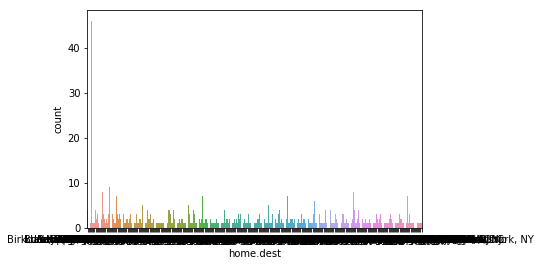

In [5]:
#add code below
plt.clf()
sns.countplot(x="survived", data=train);
plt.show()
sns.countplot(x="survived", hue='child', data=train);
plt.show()
sns.countplot(x="child", data=train);
plt.show()
sns.countplot(x="sex", data=train);
plt.show()
sns.countplot(x="embarked", data=train);
plt.show()
sns.countplot(x="pclass",hue='child' ,data=train);
plt.show()
sns.countplot(x="home.dest", data=train);
plt.show()

Use `barplot` <a href="https://seaborn.pydata.org/generated/seaborn.barplot.html" target="_blank">https://seaborn.pydata.org/generated/seaborn.barplot.html</a> to show survival for different subsets of the data. Use the new columns you added initially!

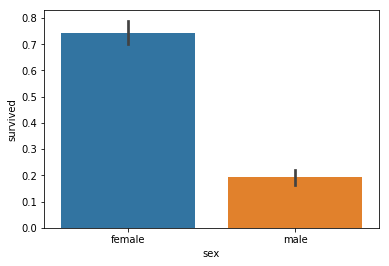

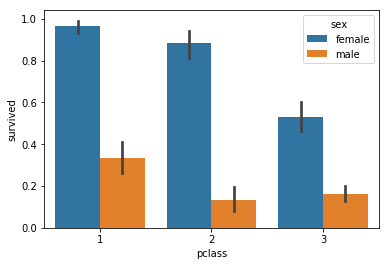

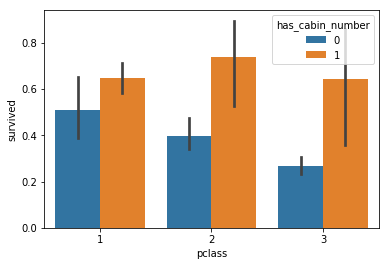

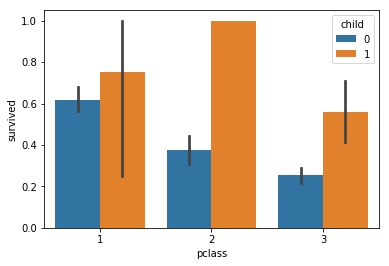

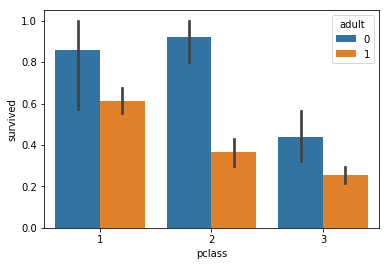

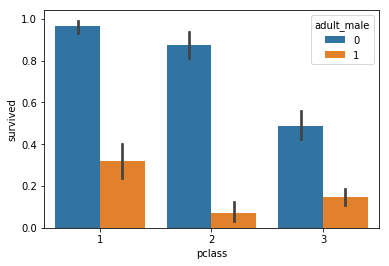

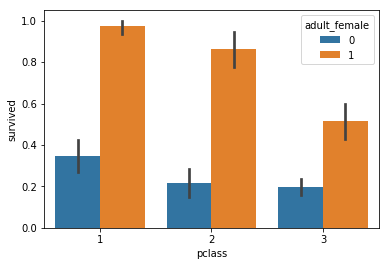

In [6]:
#EXAMPLE
plt.clf()
g = sns.barplot(x="sex",y="survived", data=train)
plt.show()
g = sns.barplot(x="pclass", y="survived", hue="sex", data=train)
plt.show()
#################

#g = sns.barplot(x="pclass", y="survived", hue="sex", data=test,hue_order=['female','male'])
g = sns.barplot(x="pclass", y="survived", hue="has_cabin_number", data=train)
plt.show()
g = sns.barplot(x="pclass", y="survived", hue="child", data=train)
plt.show()
g = sns.barplot(x="pclass", y="survived", hue="adult", data=train)
plt.show()
g = sns.barplot(x="pclass", y="survived", hue="adult_male", data=train)
plt.show()
g = sns.barplot(x="pclass", y="survived", hue="adult_female", data=train)
plt.show()
#g = sns.barplot(x="boat", y="survived", hue="has_cabin_number", data=train)
#g = sns.barplot(x="sex",y="survived", data=train)




Use `boxplot` and `violinplot` to visualize the relation between 'pclass' and 'fare' (ticket price)

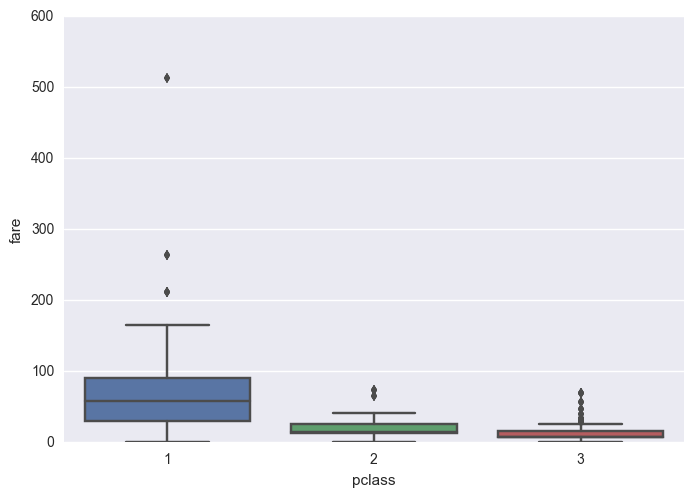

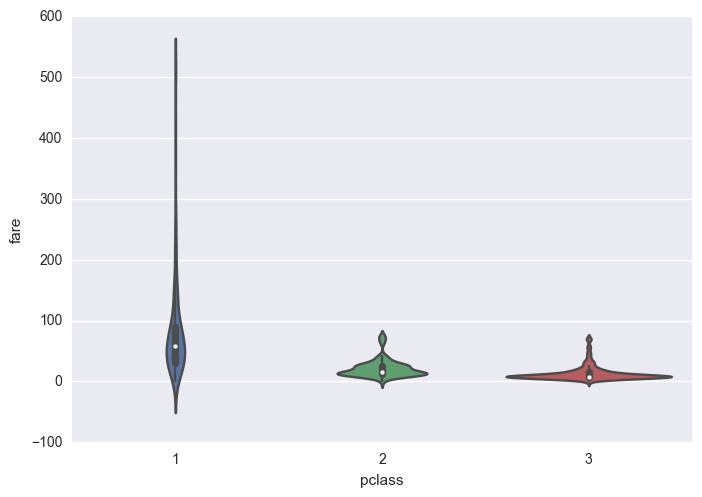

In [12]:
plt.clf()
sns.boxplot(x="pclass", y="fare", data=train)
plt.show()
sns.violinplot(x="pclass", y="fare", data=train)
plt.show()


## 2. Clustering
Here we will perform some clustering on the data to see which rows are similar. But before we do the clustering we will scale all features between 0-1 using min-max scaling. The reason to do scaling is to put all features on the same scale, for instance the "age" and "fare" columns have quite high values compared to the features.

Use the MinMaxScalar in the sklearn.preprocessing module
<a href=http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html target="_blank">
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html</a> to scale the values between 0-1

The following code snippet will scale a pandas dataframe


In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

trainable_cols=["age","fare","pclass","has_cabin_number","male","female","sibsp","parch","child","adult","adult_female","adult_male"]
trainable_cols_target=trainable_cols + ["survived"]
train_target=train[trainable_cols_target].dropna()
df=train_target[trainable_cols]

scaling=True
if scaling:
    min_max_scaler = preprocessing.MinMaxScaler()
    columns_to_scale=trainable_cols #["age","fare","pclass","child"] #,"pclass"]
    df.loc[:,columns_to_scale]=min_max_scaler.fit_transform(df[columns_to_scale].values)


    

C:\Users\tingtinf\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Using the normalized (scaled) data we will apply KMeans clustering 
<a http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html target="_blank">http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html</a> to see how it divides up the data. In KMeans you have to decide how many clusters you want beforehand, we will try to divide the data into `n_clusters=[2, 3, 4, 5]` clusters and then look and see what information it has divided up. Example below for `n_cluster=2`

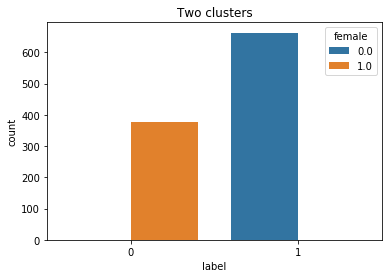

In [8]:
from sklearn.cluster import KMeans

#This will cluster df into 2 groups
kmeans = KMeans(n_clusters=2, random_state=0).fit(df.values)
#This will add a new column to the pandas with the clustering labels [0,1] in the case of n_clusters=2
df['label']=kmeans.labels_
# This will plot the counts of female (non-female) in the two groups,
# as we can see the set is split up into female and male. 
sns.countplot(x="label",hue="female",data=df)
plt.title('Two clusters')
plt.show()

Now try for `n_cluster=3` it likely that you need to plot several countplots to see how it has splitted the data now.

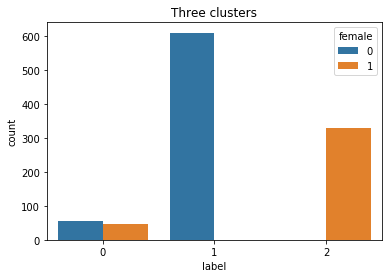

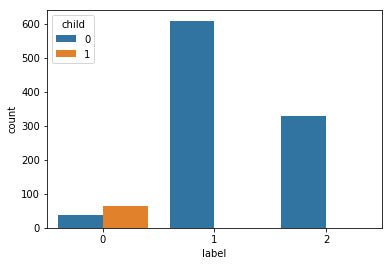

In [9]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df.values)
#kmeans.labels_

train_target['label']=kmeans.labels_
plt.clf
plt.title('Three clusters')
sns.countplot(x="label",hue="female",data=train_target)
plt.show()
sns.countplot(x="label",hue="child",data=train_target)
plt.show()




#g = sns.barplot(x="child", y="survived", hue="label", data=train_target)
#plt.show()

Now try for `n_cluster=4` 

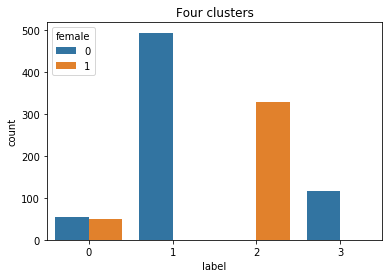

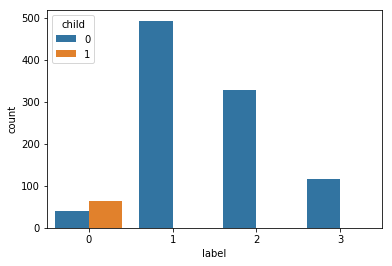

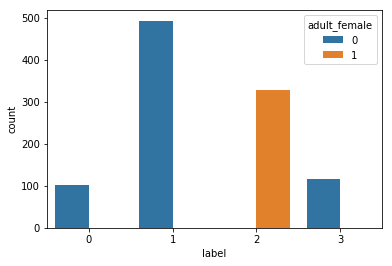

In [12]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df.values)
#kmeans.labels_

train_target['label']=kmeans.labels_
plt.clf
plt.title('Four clusters')
if False:
    for h in trainable_cols_target[2:]:
        print(h)
        sns.countplot(x="label",hue=h,data=train_target)
        plt.show()

        sns.countplot(x="label",hue="female",data=train_target)
plt.show()
sns.countplot(x="label",hue="child",data=train_target)
plt.show()
sns.countplot(x="label",hue="adult_female",data=train_target)
plt.show()
#sns.countplot(x="label",hue="child",data=train_target)
#plt.show()
    



Finally try for `n_cluster=5` 

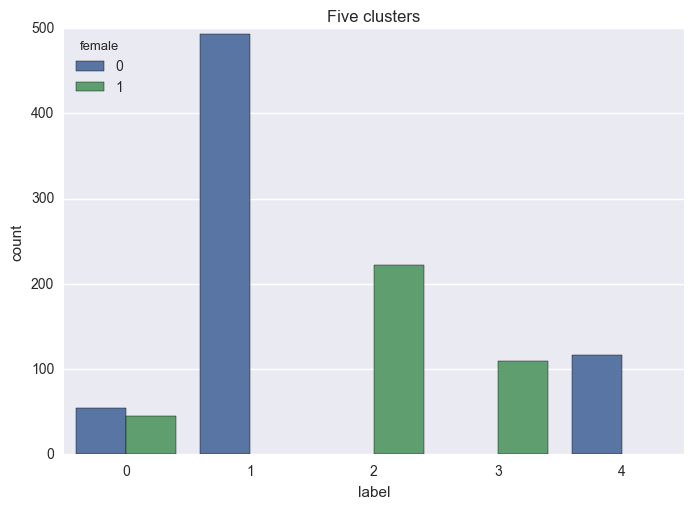

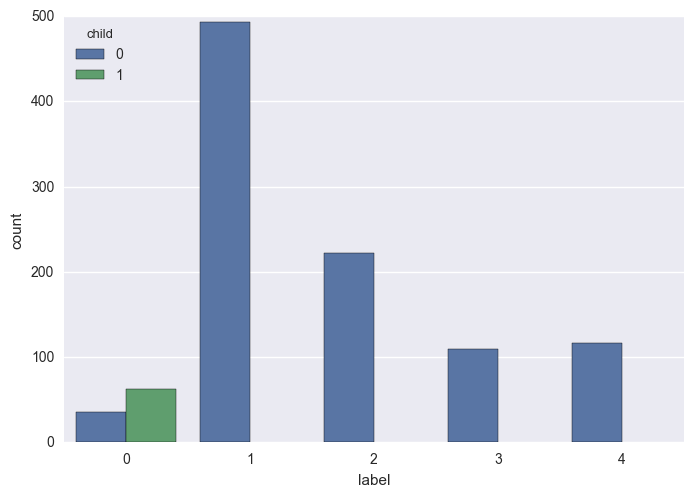

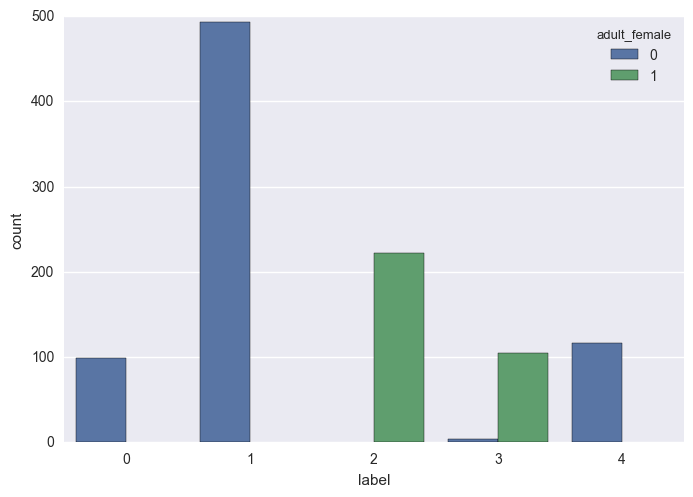

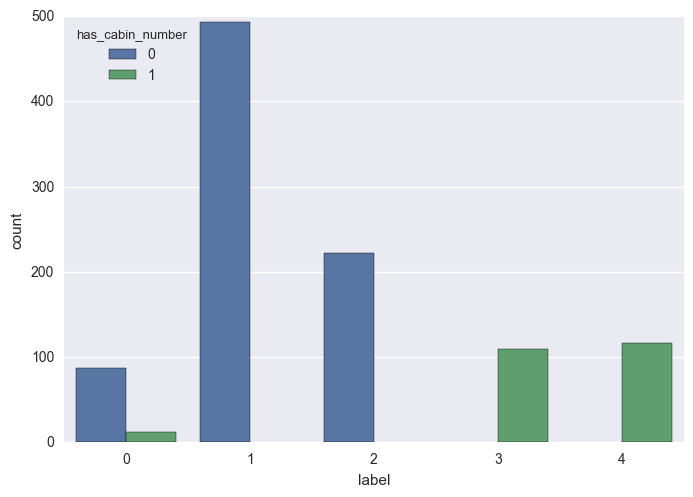

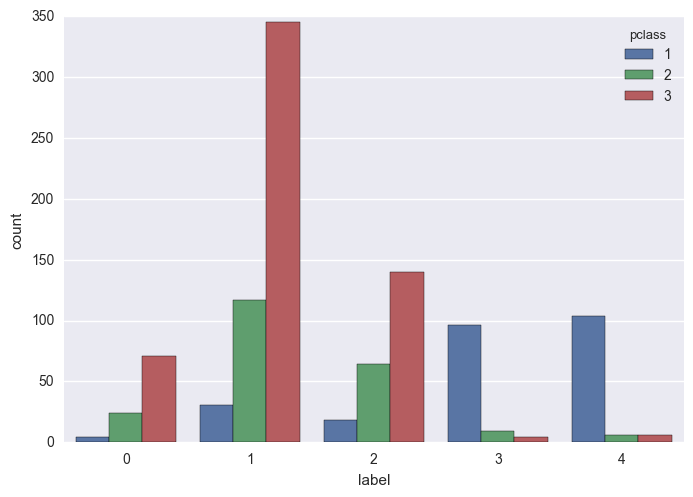

In [23]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(df.values)
#kmeans.labels_

train_target['label']=kmeans.labels_
plt.clf
plt.title('Five clusters')
if False:
    for h in trainable_cols_target[2:]:
        print(h)
        sns.countplot(x="label",hue=h,data=train_target)
        plt.show()
 
if True:
    sns.countplot(x="label",hue="female",data=train_target)
    plt.show()
    sns.countplot(x="label",hue="child",data=train_target)
    plt.show()
    sns.countplot(x="label",hue="adult_female",data=train_target)
    plt.show()
    sns.countplot(x="label",hue="has_cabin_number",data=train_target)
    plt.show()
    sns.countplot(x="label",hue="pclass",data=train_target)
    plt.show()
    #g = sns.barplot(x="label", y="female", hue="child", data=train_target)
#plt.show()
#sns.countplot(x="label",hue="child",data=train_target)
#plt.show()



In [13]:
# Let's see the data types of different features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 21 columns):
pclass              1040 non-null int64
survived            1040 non-null int64
name                1040 non-null object
sex                 1040 non-null object
age                 1040 non-null float64
sibsp               1040 non-null int64
parch               1040 non-null int64
ticket              1040 non-null object
fare                1039 non-null float64
cabin               237 non-null object
embarked            1040 non-null object
boat                393 non-null object
body                87 non-null float64
home.dest           592 non-null object
has_cabin_number    1040 non-null int64
child               1040 non-null int64
adult_male          1040 non-null int64
adult               1040 non-null int64
adult_female        1040 non-null int64
female              1040 non-null int64
male                1040 non-null int64
dtypes: float64(3), int64(11), object(7)
memo

## PCA, Principal component analysis

Make a principle component analysis of the data using the PCA module in scikit-learn
<a http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html target="_blank">http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html</a> 


* How many components are needed to explain > 90% of the variance?
* Project the compontents on to the data using the `transform` method
* Add the projected components to the pandas dataframe so you can plot them easily using `seaborn` the `lmplot` method in the `seaborn` package
* Use the `hue` option to color the points in the plot differently based on columns like this: `sns.lmplot(x='PC1',y='PC2',hue='female',data=df,fit_reg=False)`
* Can you see what characterisics of the data the components are capturing? Hint: you can also look at the actual principal compentent vector using `print (pca.components_)` if your `PCA` object is called `pca`, to see which values would dominate in the projection. This only works if there are few values that stand out.

 


In [14]:
from sklearn.decomposition import PCA
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#df
#Performing PCA using Scikit-Learn is a two-step process:

# 1. Initialize the PCA class by passing the number of components to the constructor.
# 2.Call the fit and then transform methods by passing the feature set to these methods. 
# 3.The transform method returns the specified number of principal components.

pca=PCA(n_components=5)
X = pca.fit(df.values).transform(df.values)
#print X.shape
#print X
print('explained variance ratio: %s'
      % str(pca.explained_variance_ratio_))
print(np.sum(pca.explained_variance_ratio_[0:3]))
print(df.shape)
#print train.shape
train_target['PC1']=X[:,0]
train_target['PC2']=X[:,1]
train_target['PC3']=X[:,2]
train_target['PC4']=X[:,3]
train_target['PC5']=X[:,4]
print (pca.components_)
df.columns


explained variance ratio: [0.6360517  0.17866562 0.10314285 0.02862431 0.01708638]
0.9178601785504971
(1039, 13)
[[-0.00630745  0.01910516 -0.06984285  0.07422697 -0.45627968  0.45627968
   0.01605556  0.02086539  0.01657496 -0.02800263  0.41172748 -0.43973011
  -0.45627968]
 [ 0.14139489  0.08788669 -0.6815824   0.66896684  0.03924224 -0.03924224
  -0.03451139 -0.01747223 -0.10229193  0.1638807   0.04103146  0.12284924
   0.03924224]
 [-0.19392316  0.03330279 -0.12121476  0.22604403  0.04315198 -0.04315198
   0.10612562  0.06977403  0.47381252 -0.65785359 -0.33677391 -0.32107968
   0.04315198]
 [-0.05499113 -0.03487957  0.70238702  0.70215843  0.00288902 -0.00288902
   0.02446084  0.00938747 -0.04180029  0.06771948  0.03874603  0.02897345
   0.00288902]
 [ 0.04074205  0.05574511 -0.00418558 -0.01986634  0.33665615 -0.33665615
   0.25573465  0.07740829 -0.00240631  0.05727193  0.56645105 -0.50917912
   0.33665615]]


Index(['age', 'fare', 'pclass', 'has_cabin_number', 'male', 'female', 'sibsp',
       'parch', 'child', 'adult', 'adult_female', 'adult_male', 'label'],
      dtype='object')

In [17]:
# The transformed data has been reduced to 5 dimensions
print("original shape:   ", df.shape)
print("transformed shape:", X.shape)

original shape:    (1039, 13)
transformed shape: (1039, 5)


<Figure size 432x288 with 0 Axes>

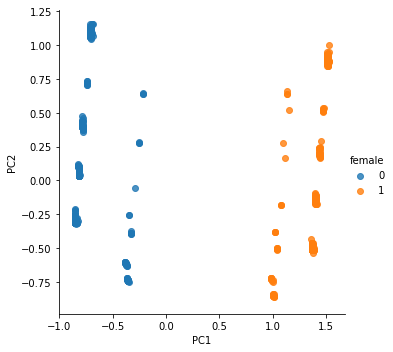

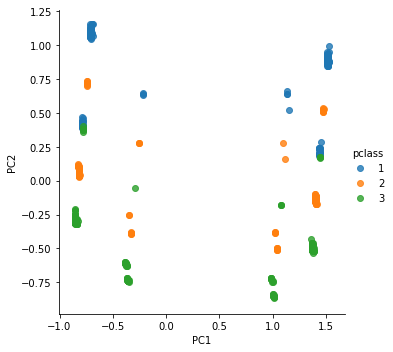

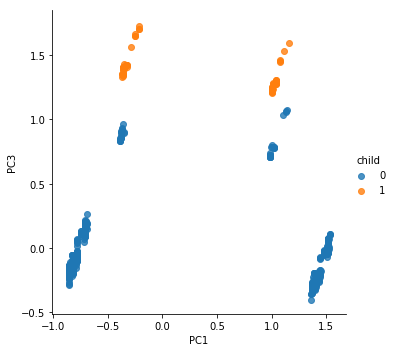

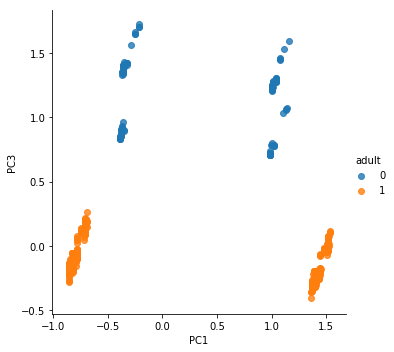

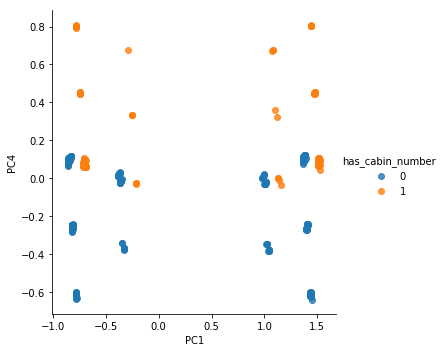

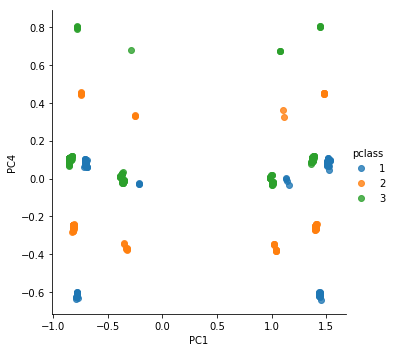

In [18]:
plt.clf()
sns.lmplot(x='PC1',y='PC2',hue='female',data=train_target,fit_reg=False)
plt.show()
sns.lmplot(x='PC1',y='PC2',hue='pclass',data=train_target,fit_reg=False)
plt.show()
sns.lmplot(x='PC1',y='PC3',hue='child',data=train_target,fit_reg=False)
plt.show()
sns.lmplot(x='PC1',y='PC3',hue='adult',data=train_target,fit_reg=False)
plt.show()
sns.lmplot(x='PC1',y='PC4',hue='has_cabin_number',data=train_target,fit_reg=False)
plt.show()
sns.lmplot(x='PC1',y='PC4',hue='pclass',data=train_target,fit_reg=False)
plt.show()
#print (pca.components_)
#print df
#df.columns

In [32]:
train_target

,age,fare,pclass,has_cabin_number,male,female,sibsp,parch,child,adult,adult_female,adult_male,survived,label,PC1,PC2,PC3,PC4,PC5
0,29.000000,211.3375,1,1,0,1,0,0,0,1,1,0,1,3,1.517181,0.895262,0.038525,0.084781,0.034692
1,53.000000,51.4792,1,1,0,1,2,0,0,1,1,0,1,3,1.513332,0.901852,-0.003816,0.085195,0.093519
2,80.000000,30.0000,1,1,1,0,0,0,0,1,0,1,1,4,-0.713919,1.154310,0.047615,0.060780,-0.024591
3,37.000000,52.5542,1,1,1,0,1,1,0,1,0,1,1,4,-0.705345,1.075526,0.174878,0.093058,-0.003583
4,47.000000,52.5542,1,1,0,1,1,1,0,1,1,0,1,3,1.514159,0.893749,0.005361,0.087254,0.067198
5,35.000000,135.6333,1,1,0,1,0,0,0,1,1,0,1,3,1.513883,0.892936,0.018984,0.085789,0.029527
6,58.000000,26.5500,1,1,0,1,0,0,0,1,1,0,1,3,1.507992,0.915087,-0.044152,0.077322,0.029432
7,41.000000,30.5000,1,1,1,0,0,0,0,1,0,1,0,4,-0.710810,1.085105,0.142680,0.087695,-0.044503
8,59.000000,51.4792,1,1,0,1,2,0,0,1,1,0,1,3,1.512856,0.912512,-0.018437,0.081050,0.096590
9,45.000000,26.5500,1,1,1,0,0,0,0,1,0,1,0,4,-0.711274,1.091534,0.132676,0.085200,-0.042885
